In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 

In [2]:
df = pd.read_excel("loan.xlsx")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

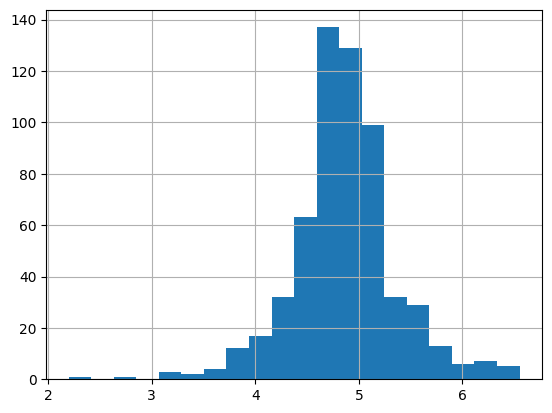

In [6]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
plt.show()

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [8]:
df['TotalIncome_log'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)
plt.show()

KeyError: 'TotalIncome'

In [36]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['LoanAmount_log'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [42]:
x = df.iloc[:,np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [43]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [46]:
print ("Percentage of missing Gender is: %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percentage of missing Gender is: 0.000000%


Number of people who take loan as group by Gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


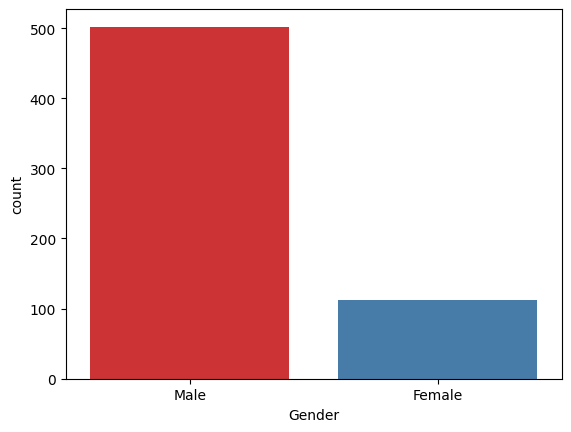

In [59]:
print("Number of people who take loan as group by Gender:")
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender', hue = 'Gender', data = df, palette = 'Set1', legend = False)
plt.show()

Number of people who take loan as group by Marital Status:
Married
Yes    401
No     213
Name: count, dtype: int64


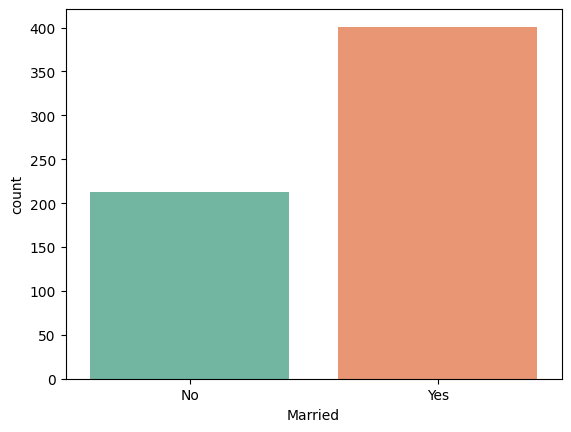

In [67]:
print("Number of people who take loan as group by Marital Status:")
print(df['Married'].value_counts())
sns.countplot(x = 'Married', hue= 'Married', data = df, palette = 'Set2' ,legend = False)
plt.show()

Number of people who take loan as group by Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


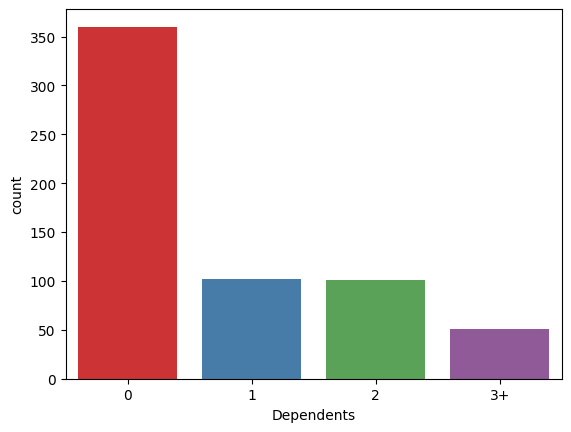

In [71]:
print("Number of people who take loan as group by Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', hue= 'Dependents', data = df, palette = 'Set1' ,legend = False)
plt.show()

Number of people who take loan as group by Self Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


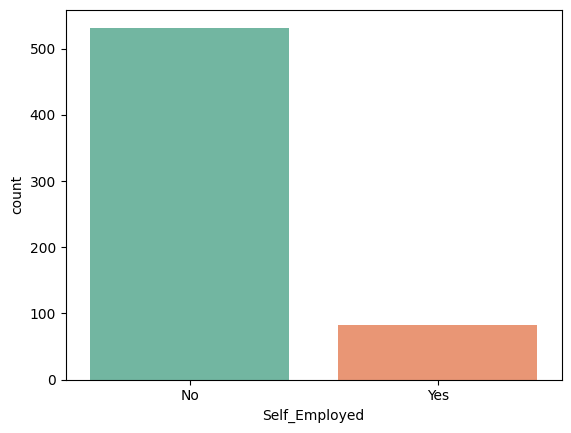

In [73]:
print("Number of people who take loan as group by Self Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed', hue= 'Self_Employed', data = df, palette = 'Set2' ,legend = False)
plt.show()

Number of people who take loan as group by Loan Amount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


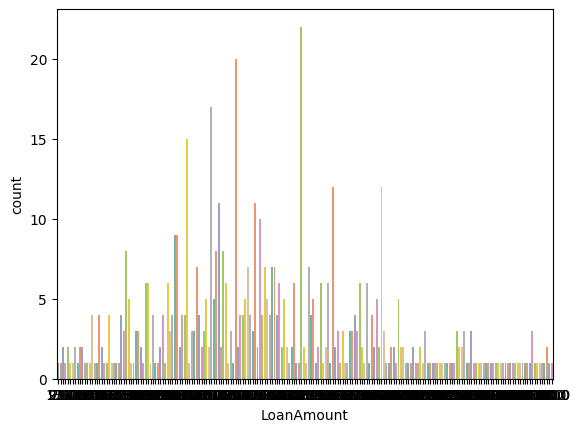

In [76]:
print("Number of people who take loan as group by Loan Amount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount', hue= 'LoanAmount', data = df, palette = 'Set2' ,legend = False)
plt.show()

Number of people who take loan as group by Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


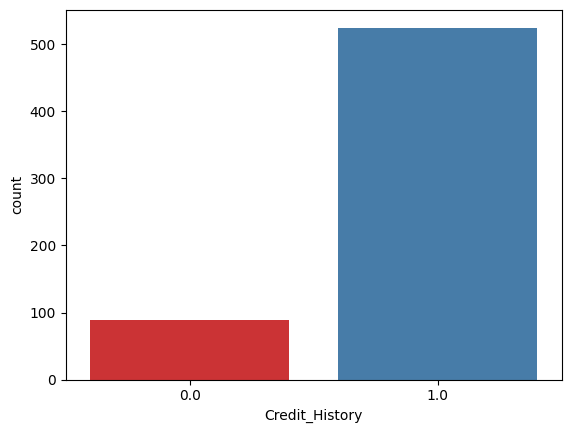

In [81]:
print("Number of people who take loan as group by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History', hue= 'Credit_History', data = df, palette = 'Set1' ,legend = False)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [123]:
for i in [0, 1, 2, 3, 4, 7]:
    if X_train[:, i].dtype == 'object':  
        X_train[:, i] = Labelencoder_x.fit_transform(X_train[:, i])

X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 456],
       [1, 1, 1, ..., 1.0, 5.278114659230517, 193],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 432],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 132],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 9],
       [0, 0, 0, ..., 1.0, 5.204006687076795, 49]], dtype=object)

In [99]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [124]:
for i in [0,1,2,3,4,7]:
    if X_test[:,i].dtype == 'object':
        X_test[:, i]= Labelencoder_x.fit_transform(X_test[:, i])
X_test

array([[1, 0, 0, 0, 4, 1.0, 4.430816798843313, 105],
       [0, 0, 0, 0, 4, 1.0, 4.718498871295094, 42],
       [1, 1, 0, 0, 4, 1.0, 5.780743515792329, 7],
       [1, 1, 0, 0, 4, 1.0, 4.700480365792417, 100],
       [1, 1, 2, 0, 4, 1.0, 4.574710978503383, 36],
       [1, 1, 0, 1, 2, 0.0, 5.10594547390058, 89],
       [1, 1, 3, 0, 2, 1.0, 5.056245805348308, 96],
       [1, 0, 0, 0, 4, 1.0, 6.003887067106539, 18],
       [1, 0, 0, 0, 4, 0.0, 4.820281565605037, 70],
       [1, 1, 0, 0, 4, 1.0, 4.852030263919617, 72],
       [0, 0, 0, 0, 4, 1.0, 4.430816798843313, 55],
       [1, 1, 1, 0, 4, 1.0, 4.553876891600541, 33],
       [0, 0, 0, 0, 4, 1.0, 5.634789603169249, 117],
       [1, 1, 2, 0, 4, 1.0, 5.4638318050256105, 118],
       [1, 1, 0, 0, 4, 1.0, 4.564348191467836, 21],
       [1, 1, 1, 0, 4, 1.0, 4.204692619390966, 36],
       [1, 0, 1, 1, 4, 1.0, 5.247024072160486, 47],
       [1, 0, 0, 1, 4, 1.0, 4.882801922586371, 39],
       [0, 0, 0, 0, 4, 1.0, 4.532599493153256, 1],
       [1,

In [127]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [129]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [133]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print("Accuracy of random forest classifire is", metrics.accuracy_score(y_pred,y_test))

y_pred
      

Accuracy of random forest classifire is 0.7723577235772358


array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [135]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [137]:
y_pred = nb_clf.predict(X_test)
print('Accuracy of Naive Bayes is', metrics.accuracy_score(y_pred, y_test))

Accuracy of Naive Bayes is 0.8292682926829268


In [139]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [145]:
y_pred = dt_clf.predict(X_test)
print("Accuracy of DT is", metrics.accuracy_score(y_pred, y_test))

Accuracy of DT is 0.6991869918699187


In [147]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [149]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [155]:
y_pred = kn_clf.predict(X_test)
print("Accuracy of KNeighbors is", metrics.accuracy_score(y_pred, y_test))

Accuracy of KNeighbors is 0.7804878048780488


In [154]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)